In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
% matplotlib inline
import scipy
import scipy.io as sp
import math

In [2]:
data = pd.read_csv("data_GP/AG/block1-UNWEIGHTED-SLOW-NONDOMINANT-RANDOM/20161213203046-59968-right-speed_0.500.csv")

In [3]:
data.head()


,frame,elapsed_time,target_x,target_y,target_z,finger_x,finger_y,finger_z,head_x,head_y,...,47_z,47_c,48_x,48_y,48_z,48_c,49_x,49_y,49_z,49_c
0,0,0.021930,-0.285367,1.508715,-1.397246,-0.319367,1.507723,-1.399650,-0.607742,1.597221,...,-1.395631,3.920728,0.0,0.0,0.0,-1.0,-0.746692,0.055536,-1.430197,3.177350
1,1,0.033005,-0.287563,1.509291,-1.403424,-0.317828,1.507326,-1.398905,-0.611118,1.595978,...,-1.395575,4.000000,0.0,0.0,0.0,-1.0,-0.746732,0.055429,-1.430171,4.000000
2,2,0.043911,-0.287488,1.509131,-1.404539,-0.315750,1.506505,-1.396964,-0.610463,1.596201,...,-1.395561,3.920642,0.0,0.0,0.0,-1.0,-0.747074,0.055301,-1.430355,3.177360
3,3,0.054935,-0.287739,1.508501,-1.405519,-0.314217,1.506992,-1.396275,-0.611702,1.596466,...,-1.395586,3.920611,0.0,0.0,0.0,-1.0,-0.746880,0.055449,-1.430208,3.177338
4,4,0.066035,-0.288231,1.508622,-1.406108,-0.313114,1.506967,-1.395494,-0.614620,1.596662,...,-1.395718,4.000000,0.0,0.0,0.0,-1.0,-0.746899,0.055483,-1.430197,4.000000


In [4]:
train = data.copy()

In [5]:
target = train[['target_x', 'target_y', 'target_z']]

In [6]:
target.head()

,target_x,target_y,target_z
0,-0.285367,1.508715,-1.397246
1,-0.287563,1.509291,-1.403424
2,-0.287488,1.509131,-1.404539
3,-0.287739,1.508501,-1.405519
4,-0.288231,1.508622,-1.406108


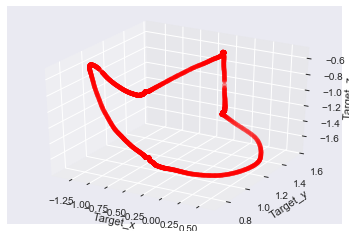

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(target.target_x, target.target_y, target.target_z, c='r', marker='o')

ax.set_xlabel('Target_x')
ax.set_ylabel('Target_y')
ax.set_zlabel('Target_z')

plt.show()

In [8]:
finger = train[['finger_x', 'finger_y', 'finger_z']]
finger.head()

,finger_x,finger_y,finger_z
0,-0.319367,1.507723,-1.399650
1,-0.317828,1.507326,-1.398905
2,-0.315750,1.506505,-1.396964
3,-0.314217,1.506992,-1.396275
4,-0.313114,1.506967,-1.395494


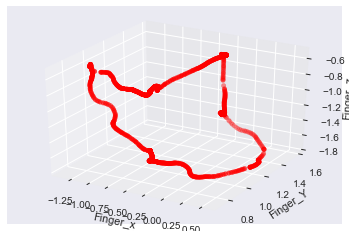

In [9]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(finger.finger_x, finger.finger_y, finger.finger_z, c='r', marker='o')

ax.set_xlabel('Finger_x')
ax.set_ylabel('Finger_Y')
ax.set_zlabel('Finger_z')

plt.show()

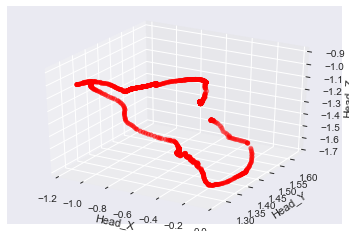

In [10]:
head = train[['head_x', 'head_y', 'head_z']]
head.head()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(head.head_x, head.head_y, head.head_z, c='r', marker='o')

ax.set_xlabel('Head_X')
ax.set_ylabel('Head_Y')
ax.set_zlabel('Head_Z')

plt.show()

In [11]:
data.shape

(1030, 211)

In [12]:
data.head()

,frame,elapsed_time,target_x,target_y,target_z,finger_x,finger_y,finger_z,head_x,head_y,...,47_z,47_c,48_x,48_y,48_z,48_c,49_x,49_y,49_z,49_c
0,0,0.021930,-0.285367,1.508715,-1.397246,-0.319367,1.507723,-1.399650,-0.607742,1.597221,...,-1.395631,3.920728,0.0,0.0,0.0,-1.0,-0.746692,0.055536,-1.430197,3.177350
1,1,0.033005,-0.287563,1.509291,-1.403424,-0.317828,1.507326,-1.398905,-0.611118,1.595978,...,-1.395575,4.000000,0.0,0.0,0.0,-1.0,-0.746732,0.055429,-1.430171,4.000000
2,2,0.043911,-0.287488,1.509131,-1.404539,-0.315750,1.506505,-1.396964,-0.610463,1.596201,...,-1.395561,3.920642,0.0,0.0,0.0,-1.0,-0.747074,0.055301,-1.430355,3.177360
3,3,0.054935,-0.287739,1.508501,-1.405519,-0.314217,1.506992,-1.396275,-0.611702,1.596466,...,-1.395586,3.920611,0.0,0.0,0.0,-1.0,-0.746880,0.055449,-1.430208,3.177338
4,4,0.066035,-0.288231,1.508622,-1.406108,-0.313114,1.506967,-1.395494,-0.614620,1.596662,...,-1.395718,4.000000,0.0,0.0,0.0,-1.0,-0.746899,0.055483,-1.430197,4.000000


In [13]:
a =  list(range(0,11,1))
data.ix[:, a].head(2)

,frame,elapsed_time,target_x,target_y,target_z,finger_x,finger_y,finger_z,head_x,head_y,head_z
0,0,0.021930,-0.285367,1.508715,-1.397246,-0.319367,1.507723,-1.399650,-0.607742,1.597221,-1.519094
1,1,0.033005,-0.287563,1.509291,-1.403424,-0.317828,1.507326,-1.398905,-0.611118,1.595978,-1.518883


In [14]:
slicex = list(range(11, 211, 4))
slicey = list(range(12, 211, 4))
slicez = list(range(13, 211, 4))

slicex_data = data.ix[:, slicex][:10]
slicey_data = data.ix[:, slicey][:10]
slicez_data = data.ix[:, slicez][:10]



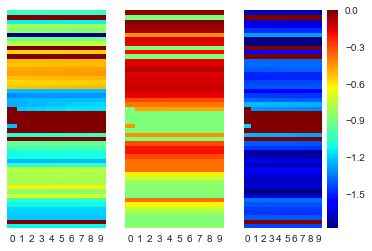

In [15]:
fig = plt.figure()
# ax1 = fig.add_subplot(311)
# ax2 = fig.add_subplot(312)
# ax3 = fig.add_subplot(313)

ax1 = plt.subplot2grid((1, 3), (0, 0))
ax2 = plt.subplot2grid((1, 3), (0, 1))
ax3 = plt.subplot2grid((1, 3), (0, 2))


sns.heatmap(slicex_data.T, ax = ax1, cmap = "jet", cbar = False, yticklabels = False);


sns.heatmap(slicey_data.T, ax = ax2, cmap = "jet", cbar = False, yticklabels = False);


sns.heatmap(slicez_data.T, ax = ax3, cmap = "jet", cbar = True, yticklabels = False);

In [16]:
import sklearn
from sklearn import preprocessing
slicex_scaled = preprocessing.scale(slicex_data)
slicey_scaled = preprocessing.scale(slicey_data)
slicez_scaled = preprocessing.scale(slicez_data)


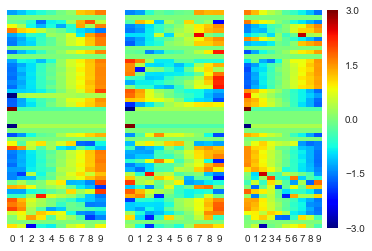

In [17]:
fig = plt.figure()
# ax1 = fig.add_subplot(311)
# ax2 = fig.add_subplot(312)
# ax3 = fig.add_subplot(313)

ax1 = plt.subplot2grid((1, 3), (0, 0))
ax2 = plt.subplot2grid((1, 3), (0, 1))
ax3 = plt.subplot2grid((1, 3), (0, 2))


sns.heatmap(slicex_scaled.T, ax = ax1, cmap = "jet", cbar = False, yticklabels = False);


sns.heatmap(slicey_scaled.T, ax = ax2, cmap = "jet", cbar = False, yticklabels = False);


sns.heatmap(slicez_scaled.T, ax = ax3, cmap = "jet", cbar = True, yticklabels = False);

In [18]:
#results = scipy.optimize.fmin_cg(logPosterior, theta, fprime = graLogPosterior,args = [(X,y)], gtol = 1e-4, maxiter =5, disp=1)


In [19]:
%ls data_GP/AG/block1-UNWEIGHTED-SLOW-NONDOMINANT-RANDOM/


20161213203046-59968-right-speed_0.500.csv*


In [20]:
data1 = pd.read_csv("data_GP/AG/block1-UNWEIGHTED-SLOW-NONDOMINANT-RANDOM/20161213203046-59968-right-speed_0.500.csv")
data2 = pd.read_csv("data_GP/AG/block2-UNWEIGHTED-SLOW-NONDOMINANT-RANDOM/20161213204004-59968-right-speed_0.500.csv")


In [21]:
#data1 = normalize(data1)

In [22]:
data1.head(3)


,frame,elapsed_time,target_x,target_y,target_z,finger_x,finger_y,finger_z,head_x,head_y,...,47_z,47_c,48_x,48_y,48_z,48_c,49_x,49_y,49_z,49_c
0,0,0.021930,-0.285367,1.508715,-1.397246,-0.319367,1.507723,-1.399650,-0.607742,1.597221,...,-1.395631,3.920728,0.0,0.0,0.0,-1.0,-0.746692,0.055536,-1.430197,3.17735
1,1,0.033005,-0.287563,1.509291,-1.403424,-0.317828,1.507326,-1.398905,-0.611118,1.595978,...,-1.395575,4.000000,0.0,0.0,0.0,-1.0,-0.746732,0.055429,-1.430171,4.00000
2,2,0.043911,-0.287488,1.509131,-1.404539,-0.315750,1.506505,-1.396964,-0.610463,1.596201,...,-1.395561,3.920642,0.0,0.0,0.0,-1.0,-0.747074,0.055301,-1.430355,3.17736


In [23]:
data2.head(3)

,frame,elapsed_time,target_x,target_y,target_z,finger_x,finger_y,finger_z,head_x,head_y,...,47_z,47_c,48_x,48_y,48_z,48_c,49_x,49_y,49_z,49_c
0,0,0.021660,-0.285367,1.508715,-1.397246,-0.273740,1.500969,-1.371183,0.206660,1.636721,...,-0.802860,4.000000,0.0,0.0,0.0,-1.0,0.309161,0.064634,-0.841589,4.000000
1,1,0.032780,-0.287563,1.509291,-1.403424,-0.276582,1.502027,-1.374369,0.204551,1.637265,...,-0.802822,3.580956,0.0,0.0,0.0,-1.0,0.309194,0.064536,-0.841570,3.403685
2,2,0.043799,-0.287488,1.509131,-1.404539,-0.278451,1.502474,-1.376174,0.204752,1.637371,...,-0.802977,4.000000,0.0,0.0,0.0,-1.0,0.309196,0.064529,-0.841723,4.000000


In [24]:
x = data1.loc[:,['finger_x']]
y = data1.loc[:,['target_x']]
xstar = data2.loc[:,['finger_x']]
ystar = data2.loc[:,['target_x']]

n = 120

In [25]:
x = x[:n]
y = y[:n]
xstar = xstar[:n]
ystar = ystar[:n]

In [26]:
# def normalize(data):
#     data = (data - np.min(data))/(np.max(data) - np.min(data))
#     return data

In [27]:
# x = normalize(x)
# y = normalize(y)
# xstar = normalize(xstar)
# ystar = normalize(ystar)

In [28]:
theta = np.array([0.1, 0.1, 0.1 ]) # [var_f, length, var_n]
theta[0]

0.10000000000000001

In [29]:
def kernel(x1, x2, theta, noise = 0):
    theta = np.squeeze(theta)
    var_f = theta[0]
    length = theta[1]
    var_n = theta[2]
    sh = x1.shape[0]
    x1 = x1.T
    x2 = x2.T
    x1 = np.tile(x1, (x1.shape[0], 1))
    x2 = np.tile(x2, (x2.shape[0],1)).T
#     print(x1.shape)
#     print(x2.shape)
    
#     k = (math.exp(var_f))*np.exp(-0.5*(np.exp(length))*((x-xstar)**2)) + noise*(math.exp(var_n))* (np.eye(x.shape[0]))
    k = np.exp(var_f)*np.exp(-0.5*np.exp(length)*((x1-x2)**2))
#     print(k.shape)
    n = noise*(np.exp(var_n))* np.eye(sh)
#     print(n.shape)
    K = np.add(k,n)
    return K
    
    

In [30]:
K = kernel(x, x, theta, noise = 1) # x1 = x[:60], x2 = x[:60]
Kstar= kernel(x, xstar, theta, noise = 0) # x1 = x[:60], x2 = x[:60]
Kstars= kernel(xstar, xstar, theta, noise = 0) # x1 = x[:60], x2 = x[:60]


In [31]:
#print(K)

In [32]:
L = np.linalg.cholesky(K)

In [33]:
alpha = np.linalg.solve(L.transpose(), np.linalg.solve(L,y[:n]))

In [34]:
fbarstar = np.dot(Kstar.transpose(), alpha)
mean = fbarstar
mean.shape

(120, 1)

In [35]:
v = np.linalg.solve(L, Kstar)
f_var = Kstars-np.dot(v.T, v)
f_var.shape

(120, 120)

In [36]:
# Kstars.shape

In [37]:
def logPost(theta, *args):
    global theta2
    '''
    Input: x, y, theta, K
    output: -logProb, f_mean, f_var
    '''
#     (x, y) =  args
#     var_f = theta[0]
#     length = theta[1]
#     var_n = theta[2]
#     sh = x.shape[0]
# #     K = kernel(x[:n], x[:n], theta, noise = 1)
#     q = np.exp(theta[0])
#     p = np.exp(-0.5*np.exp(length)*((x1-x2)**2))
#     k = np.dot(p,q)
#     n = (np.exp(var_n))* np.eye(sh)
  
#     Q = k+n
    theta = np.squeeze(theta)

    #print("start")
    #print(theta.shape)
    (x,y) = args
    y = y.as_matrix()
    var_f = theta[0]
    length = theta[1]
    var_n = theta[2]
    print("theta", theta)
    theta2 = theta.copy()
    sh = x.shape[0]
    x1 = x.T
    x2 = x.T
    #print("1")
    x1 = np.tile(x1, (x1.shape[0], 1))
    x2 = np.tile(x2, (x2.shape[0],1)).T
    q = np.exp(var_f)
    p = np.exp(-0.5*np.exp(length)*((x1-x2)**2))
    k = np.dot(p,q)
    n = (np.exp(var_n))* np.eye(sh)
    #print("2")
    
    Q = k+n
    #print("2.1")
    L = np.linalg.cholesky(Q)
    #print("2.2")
    #print(type(y))
    #print(theta.shape)
    alpha = np.linalg.solve(L.transpose(), np.linalg.solve(L,y))
    #print(np.shape(x))
    #print("3")
    logP = -0.5*np.dot(y.transpose(), alpha) - np.sum(np.log(np.diag(L))) - sh/2 * np.log(2.*np.pi)
    #f_mean = np.dot(Kstar.transpose(), alpha)
    #v = np.linalg.solve(L, Kstar)
    #f_var = Kstars-np.dot(v.T, v)
    return -logP


In [38]:
def kernel(x1, x2, theta, noise = 0):
    theta = np.squeeze(theta)

    var_f = theta[0]
    length = theta[1]
    var_n = theta[2]
    sh = x1.shape[0]
    x1 = x1.T
    x2 = x2.T
    x1 = np.tile(x1, (x1.shape[0], 1))
    x2 = np.tile(x2, (x2.shape[0],1)).T
#     print(x1.shape)
#     print(x2.shape)
    
#     k = (math.exp(var_f))*np.exp(-0.5*(np.exp(length))*((x-xstar)**2)) + noise*(math.exp(var_n))* (np.eye(x.shape[0]))
    k = np.exp(var_f)*np.exp(-0.5*np.exp(length)*((x1-x2)**2))
#     print(k.shape)
    n = noise*(np.exp(var_n))* np.eye(sh)
#     print(n.shape)
    K = np.add(k,n)
    return K

In [39]:
def glogPost(theta, *args):
    
    theta = np.squeeze(theta)

    (x,y) = args
    var_f = theta[0]
    length = theta[1]
    var_n = theta[2]
    sh = x.shape[0]
    x1 = x.T
    x2 = x.T
    x1 = np.tile(x1, (x1.shape[0], 1))
    x2 = np.tile(x2, (x2.shape[0],1)).T
    q = np.exp(var_f)
    p = np.exp(-0.5*np.exp(length)*((x1-x2)**2))
    k = np.dot(p,q)
    n = (np.exp(var_n))* np.eye(sh)
    
    
    Q = k+n
    Q_inv = np.linalg.inv(Q)

    kF = k
    kN = n
    kL = np.dot(k, (-0.5*np.exp(length)*((x1-x2)**2)))
    #print(kF, kN, kL)
    
    gradF = 0.5*(np.dot(y.T, np.dot(Q_inv, np.dot(kF, np.dot(Q_inv, y))))) - 0.5*(np.trace(np.dot(Q_inv, kF)))
    gradN = 0.5*(np.dot(y.T, np.dot(Q_inv, np.dot(kN, np.dot(Q_inv, y))))) - 0.5*(np.trace(np.dot(Q_inv, kN)))
    gradL = 0.5*(np.dot(y.T, np.dot(Q_inv, np.dot(kL, np.dot(Q_inv, y))))) - 0.5*(np.trace(np.dot(Q_inv, kL)))

    
    d = np.array([gradF[0][0], gradN[0][0], gradL[0][0]])
#     print(d)
    return -d


In [40]:
#     q = np.exp(-0.5*np.exp(length)*((x1-x2)**2))
#     q = np.exp(np.dot(-0.5,np.dot(np.exp(length), ((x1-x2)**2))))
#     k = np.dot(np.exp(var_f),q)
#     n = np.dot(np.exp(var_n)), np.eye(sh)

In [41]:
# theta = np.array([0.1, 0.1, 0.1])
# for i in range(10):
#     logP = logPost(theta, x, y)
#     theta = glogPost(theta, x, y)
    
# print(logP)
# print(theta)


In [42]:
theta2 = 0

results = scipy.optimize.fmin_cg(logPost, theta, fprime = glogPost, args = (x,y),gtol = 1e-4, maxiter=6, disp=False, full_output = 1)
print("Final Theta Value:")
print(theta2)

theta [ 0.1  0.1  0.1]
theta [ 0.08850534 -0.90457375  0.2039204 ]
theta [ 0.09786551 -0.08654344  0.11929741]
theta [ 0.09960223  0.06523689  0.10359615]
theta [ 0.09992581  0.0935164   0.10067071]
theta [ 0.09998616  0.09879056  0.10012511]
theta [ 0.09999742  0.09977439  0.10002334]
theta [ 0.09999952  0.09995791  0.10000435]
theta [ 0.09999991  0.09999215  0.10000081]
theta [ 0.09999998  0.09999854  0.10000015]
theta [ 0.1         0.09999973  0.10000003]
theta [ 0.1         0.09999995  0.10000001]
theta [ 0.1         0.09999999  0.1       ]
theta [ 0.1  0.1  0.1]
theta [ 0.1  0.1  0.1]
theta [ 0.1  0.1  0.1]
theta [ 0.1  0.1  0.1]
theta [ 0.1  0.1  0.1]
theta [ 0.1  0.1  0.1]
theta [ 0.1  0.1  0.1]
theta [ 0.1  0.1  0.1]
theta [ 0.1  0.1  0.1]
theta [ 0.1  0.1  0.1]
theta [ 0.1  0.1  0.1]
theta [ 0.1  0.1  0.1]
theta [ 0.1  0.1  0.1]
theta [ 0.1  0.1  0.1]
theta [ 0.1  0.1  0.1]
theta [ 0.1  0.1  0.1]
theta [ 0.1  0.1  0.1]
theta [ 0.1  0.1  0.1]
theta [ 0.1  0.1  0.1]
theta [ 0.1 

Theta has:  var-f, length, var_n

In [43]:
mean.shape

(120, 1)

In [44]:
f_var.shape

(120, 120)

In [67]:
def kernel(x1, x2, theta, noise = 0):
    theta = np.squeeze(theta)

    
    var_f = theta[0]
    length = theta[1]
    var_n = theta[2]
    sh = x1.shape[0]
    x1 = x1.T
    x2 = x2.T
    x1 = np.tile(x1, (x1.shape[0], 1))
    x2 = np.tile(x2, (x2.shape[0],1)).T
#     print(x1.shape)
#     print(x2.shape)
    
#     k = (math.exp(var_f))*np.exp(-0.5*(np.exp(length))*((x-xstar)**2)) + noise*(math.exp(var_n))* (np.eye(x.shape[0]))
    k = np.exp(var_f)*np.exp(-0.5*np.exp(length)*((x1-x2)**2))
#     print(k.shape)
    n = noise*(np.exp(var_n))* np.eye(sh)
#     print(n.shape)
    K = np.add(k,n)
    return K

In [90]:
m = kernel(np.matrix(2),np.matrix(3), theta)
mm = m[0,0]
mm

0.63598171946298909

In [121]:
def mean_var(x, y, theta, xstar, K):
    Kstars= kernel(np.matrix(xstar), np.matrix(xstar), theta, noise = 0)[0,0] # x1 = x[:60], x2 = x[:60]
    Kstar= np.array([kernel(np.matrix(x.ix[i]), np.matrix(xstar), theta, noise = 0)[0,0] for i in range(len(x))]) # x1 = x[:60], x2 = x[:60]
    L = np.linalg.cholesky(K)
    alpha = np.linalg.solve(L.transpose(), np.linalg.solve(L,y[:n]))
    fbarstar = np.dot(Kstar.transpose(), alpha)
    mean = fbarstar[0]
    #print(mean)
    #mean.shape
    v = np.linalg.solve(L, Kstar)
    f_var = Kstars-np.dot(v.T, v)
    #print(f_var)
    #f_var.shape
    return mean, f_var

In [122]:
mean_var(x, y, theta, 3, K)

(0.034125827197501908, 1.1020874262748548)

In [136]:
x_pred = np.linspace(np.min(x), np.max(x), 500)
#x_pred


In [140]:
mv = np.array([mean_var(x, y, theta2, p, K) for p in x_pred]).squeeze().transpose()
mv

(2, 500)

In [142]:
mean = mv[0]
var = mv[1]


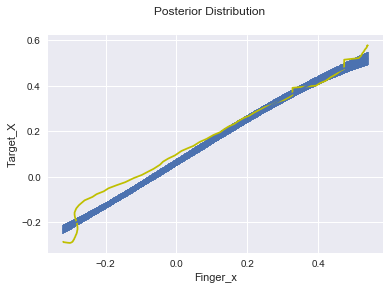

In [143]:
plt.errorbar(x_pred, mean, var)
plt.plot(x,y, "y-")
plt.xlabel("Finger_x")
plt.ylabel("Target_X")
plt.suptitle("Posterior Distribution")
plt.savefig("Post2.png")
plt.show()